<a href="https://colab.research.google.com/github/nileshvarshney/MachineLearning/blob/development/Deep%20Learning/MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# make the code compatible to both python 2 and python3
from __future__ import print_function,absolute_import,division

import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

print(np.__version__)
print(matplotlib.__version__)
print(tf.__version__)

1.16.4
3.0.3
1.14.0


In [0]:
# Read the dataset
mnist = keras.datasets.fashion_mnist

(x_train_full, y_train_full), (x_test, y_test) =  mnist.load_data()

In [7]:
print(x_train_full.shape, y_test_full.shape)
print(x_train_full.dtype)

(60000, 28, 28) (60000,)
uint8


In [0]:
# split training data in training set and validation
x_validation, x_train = x_train_full[:5000], x_train_full[5000:]
y_validation, y_train = y_train_full[:5000], y_train_full[5000:]

# normalize data
x_validation, x_train = x_validation/255.0, x_train/255.0


class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

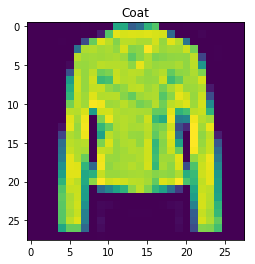

In [26]:
def plot_picture(index):
  plt.imshow(x_train[index].reshape(28,28), interpolation='nearest')
  plt.title(class_names[y_train[index]])
  plt.show()
  
plot_picture(9)

In [29]:
# create model using sequencial api
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28, 28]))
model.add(keras.layers.Dense(300,activation = "relu"))
model.add(keras.layers.Dense(100,activation = "relu"))
model.add(keras.layers.Dense(10,activation = "softmax"))

model.summary()

W0830 18:51:47.803704 140185656838016 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [31]:
print(model.layers)
print(model.layers[0].name)
print(model.layers[1].name)
print(model.layers[2].name)
print(model.layers[3].name)

[<tensorflow.python.keras.layers.core.Flatten object at 0x7f7f3be677b8>, <tensorflow.python.keras.layers.core.Dense object at 0x7f7f3ee60668>, <tensorflow.python.keras.layers.core.Dense object at 0x7f7f3bd51470>, <tensorflow.python.keras.layers.core.Dense object at 0x7f7f3bd51908>]
flatten
dense
dense_1
dense_2


In [35]:
weights, bias = model.layers[1].get_weights()
print(weights)
print(bias)

[[-0.04906161 -0.02331203  0.03337326 ... -0.06073682 -0.02312337
   0.05814646]
 [-0.01746373  0.05973896 -0.06341302 ... -0.03136097  0.01893464
   0.0376079 ]
 [ 0.04326729  0.04192501 -0.05786352 ... -0.00777975  0.05239101
   0.07125805]
 ...
 [ 0.0134677  -0.03213127 -0.07098694 ...  0.03276577 -0.05353105
  -0.0711353 ]
 [ 0.010222    0.06024396 -0.04595589 ...  0.07183863 -0.05670902
  -0.003826  ]
 [-0.05771864  0.06125417 -0.06345606 ...  0.03629626 -0.0619307
  -0.04106625]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [0]:
# Compile the model
model.compile(
    loss=keras.losses.sparse_categorical_crossentropy, 
    optimizer=keras.optimizers.SGD(lr=0.01), 
    metrics=["accuracy"])

In [41]:
history = model.fit(
    x_train, y_train, 
    epochs = 30, 
    validation_data = (x_validation, y_validation))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 6s 106us/sample - loss: 0.7214 - acc: 0.7629 - val_loss: 0.5697 - val_acc: 0.7950
Epoch 2/30
55000/55000 [==============================] - 5s 97us/sample - loss: 0.4909 - acc: 0.8288 - val_loss: 0.4919 - val_acc: 0.8234
Epoch 3/30
55000/55000 [==============================] - 5s 98us/sample - loss: 0.4445 - acc: 0.8427 - val_loss: 0.4158 - val_acc: 0.8590
Epoch 4/30
55000/55000 [==============================] - 5s 99us/sample - loss: 0.4173 - acc: 0.8540 - val_loss: 0.4092 - val_acc: 0.8532
Epoch 5/30
55000/55000 [==============================] - 5s 98us/sample - loss: 0.3976 - acc: 0.8604 - val_loss: 0.3815 - val_acc: 0.8664
Epoch 6/30
55000/55000 [==============================] - 5s 97us/sample - loss: 0.3821 - acc: 0.8641 - val_loss: 0.3646 - val_acc: 0.8724
Epoch 7/30
55000/55000 [==============================] - 5s 94us/sample - loss: 0.3679 - acc: 0.8684 - val_loss: 0.

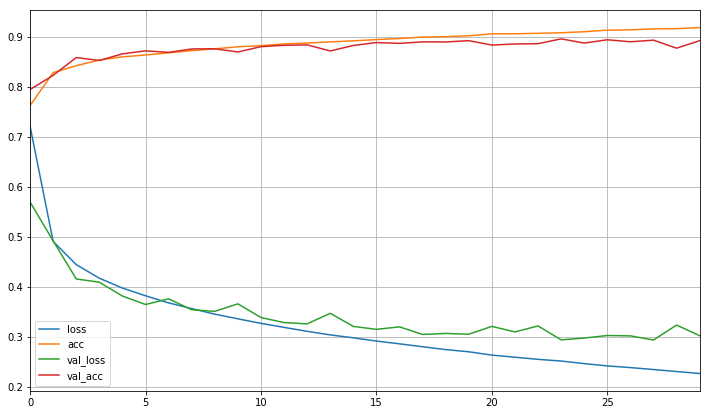

In [46]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(12, 7));
plt.grid(True)

In [47]:
# Evaluate Model
model.evaluate(x_test/255.0,  y_test)

10000/10000 [==============================] - 0s 42us/sample - loss: 0.3337 - acc: 0.8815


[0.33373005471229555, 0.8815]

In [50]:
# Make prediction
x_new = x_test[:3]/255.0
y_prob = model.predict(x_new)
print(y_test[:3])
print(y_prob)
print(model.predict_classes(x_new))

[9 2 1]
[[8.0868585e-07 3.3271940e-07 6.7718829e-06 2.5879108e-06 8.7238759e-06
  3.4423801e-03 3.0055568e-05 3.6707863e-03 2.4340495e-04 9.9259418e-01]
 [1.0297739e-04 8.1339619e-09 9.9947232e-01 1.0630745e-08 3.7149136e-04
  7.5326958e-12 5.3255997e-05 1.2187075e-11 3.4793366e-08 1.0340945e-11]
 [3.1008040e-05 9.9996722e-01 3.9892456e-07 1.2388167e-06 1.4346389e-07
  1.6349555e-10 1.6641570e-08 1.4891600e-11 5.8649263e-10 3.9629875e-12]]
[9 2 1]


In [54]:
np.array(class_names)[model.predict_classes(x_new)]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [0]:
import EB